[![AWS SDK for pandas](_static/logo.png "AWS SDK for pandas")](https://github.com/aws/aws-sdk-pandas)

# 40 - Textract

Amazon Textract is a machine learning (ML) service that automatically extracts text, handwriting, and data from files.
Some examples using textract apis can be found in https://github.com/aws-samples/amazon-textract-code-samples

## Upload File Example

In [50]:
import getpass
bucket_name = getpass.getpass()

In [51]:
! wget https://raw.githubusercontent.com/aws-samples/amazon-textract-code-samples/master/python/employmentapp.png
! wget https://raw.githubusercontent.com/aws-samples/amazon-textract-code-samples/master/python/expense.png
! wget https://raw.githubusercontent.com/aws-samples/amazon-textract-code-samples/master/python/verification-of-employment.png

--2023-04-24 20:04:35--  https://raw.githubusercontent.com/aws-samples/amazon-textract-code-samples/master/python/employmentapp.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 295219 (288K) [image/png]
Saving to: ‘employmentapp.png.1’

employmentapp.png.1 100%[===================>] 288.30K  --.-KB/s    in 0.005s  

2023-04-24 20:04:36 (56.9 MB/s) - ‘employmentapp.png.1’ saved [295219/295219]

--2023-04-24 20:04:36--  https://raw.githubusercontent.com/aws-samples/amazon-textract-code-samples/master/python/expense.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent

In [52]:
s3_path = f"s3://{bucket_name}/imagefolder/employmentapp.png"
local_file_dir='employmentapp.png'
wr.s3.upload(path=s3_path, local_file=local_file_dir)

s3_path = f"s3://{bucket_name}/imagefolder/expense.png"
local_file_dir='expense.png'
wr.s3.upload(path=s3_path, local_file=local_file_dir)

s3_path = f"s3://{bucket_name}/imagefolder/verification-of-employment.png"
local_file_dir='verification-of-employment.png'
wr.s3.upload(path=s3_path, local_file=local_file_dir)


## Extract Tables from PDF File

### Example: employmentapp.png

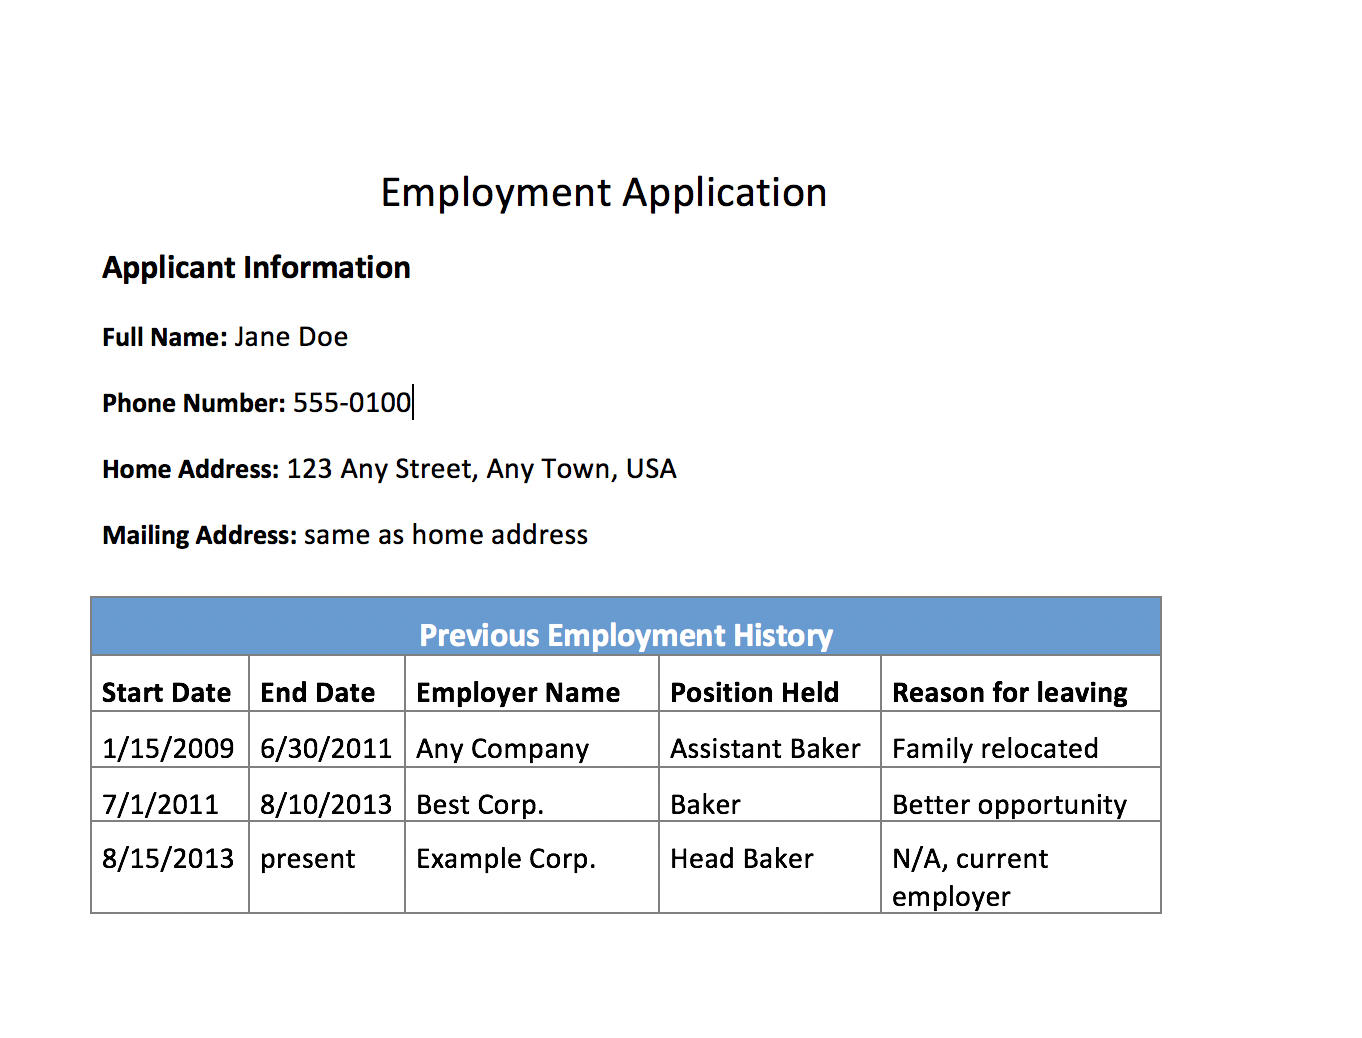

In [53]:
from IPython.display import Image
display(Image(filename='employmentapp.png'))

In [54]:
response = wr.textract.analyze_document_table(
    s3_bucket_name = bucket_name,
    s3_key = 'imagefolder/employmentapp.png'
)

the analyze_document_table returns a list of pandas dataframe, and every dataframe corresponde to a table in the file

In [55]:
print(len(response))
print(type(response[0]))
print(type(response[1]))

2
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [56]:
print(response[0])

          Applicant                    Information
0   Full Name: Jane                            Doe
1     Phone Number:                       555-0100
2     Home Address:  123 Any Street, Any Town, USA
3  Mailing Address:           same as home address


In [57]:
print(response[1])

                         Previous Employment          History  \
0  Start Date   End Date       Employer Name    Position Held   
1   1/15/2009  6/30/2011         Any Company  Assistant Baker   
2    7/1/2011  8/10/2013          Best Corp.            Baker   
3   8/15/2013    present       Example Corp.       Head Baker   

                          
0     Reason for leaving  
1       Family relocated  
2     Better opportunity  
3  N/A, current employer  


### Example: expense.png

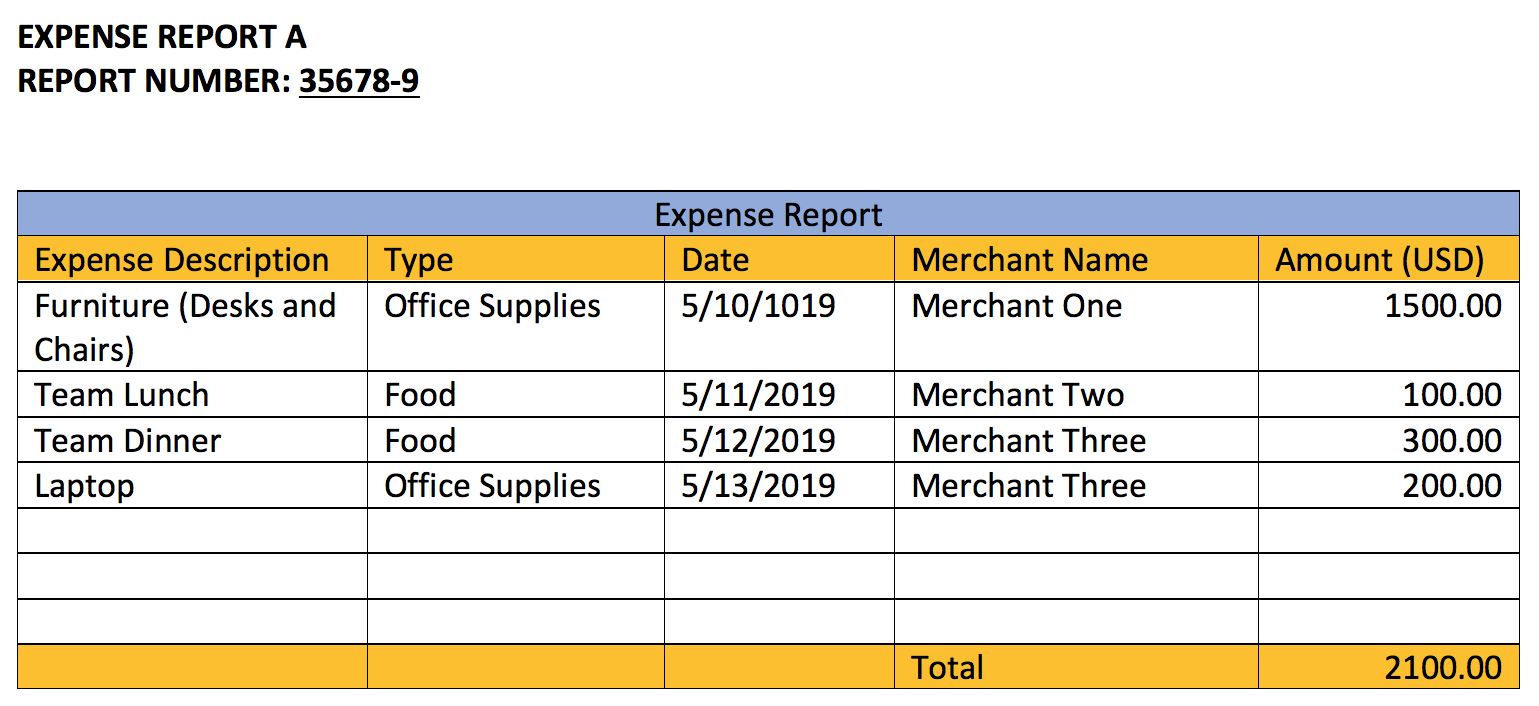

In [58]:
display(Image(filename='expense.png'))

In [59]:
response = wr.textract.analyze_document_table(
    s3_bucket_name = bucket_name,
    s3_key = 'imagefolder/expense.png'
)

In [60]:
print(len(response))
print(type(response[0]))

1
<class 'pandas.core.frame.DataFrame'>


In [61]:
print(response[0])

                                                 Expense Report  \
0           Expense Description             Type           Date   
1  Furniture (Desks and Chairs)  Office Supplies      5/10/1019   
2                    Team Lunch             Food      5/11/2019   
3                   Team Dinner             Food      5/12/2019   
4                        Laptop  Office Supplies      5/13/2019   
5                                                                 
6                                                                 
7                                                                 
8                                                                 

                                 
0   Merchant Name  Amount (USD)  
1    Merchant One       1500.00  
2    Merchant Two        100.00  
3  Merchant Three        300.00  
4  Merchant Three        200.00  
5                                
6                                
7                                
8           Total      

### Example: verification-of-employment.png

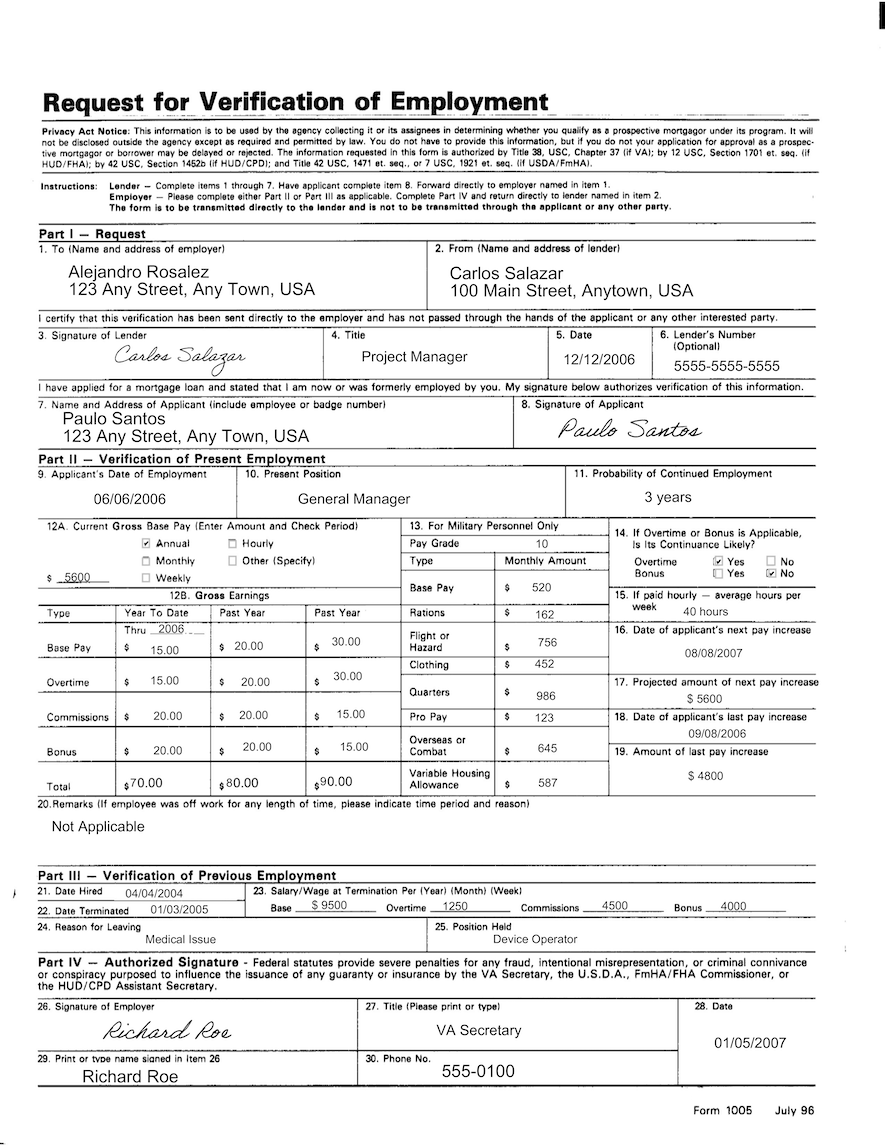

In [62]:
display(Image(filename='verification-of-employment.png'))

In [63]:
response = wr.textract.analyze_document_table(
    s3_bucket_name = bucket_name,
    s3_key = 'imagefolder/verification-of-employment.png'
)

In [64]:
print(len(response))
print(type(response[0]))

2
<class 'pandas.core.frame.DataFrame'>


In [65]:
print(response[0])

                       12B. Gross   Earnings             \
0         Type       Year To Date  Past Year  Past Year   
1     Base Pay  Thru 2006 $ 15.00    $ 20.00    30.00 $   
2                                                         
3     Overtime            $ 15.00    $ 20.00    30.00 $   
4  Commissions            $ 20.00    $ 20.00    $ 15.00   
5        Bonus            $ 20.00    $ 20.00    $ 15.00   
6        Total            $ 70.00    $ 80.00    $ 90.00   

                     Base Pay         
0                     Rations  $ 162  
1            Flight or Hazard  $ 756  
2                    Clothing  $ 452  
3                    Quarters  $ 986  
4                     Pro Pay  $ 123  
5          Overseas or Combat  $ 645  
6  Variable Housing Allowance  $ 587  


In [66]:
print(response[1])

                  26. Signature of Employer 27. Title (Please print or type)  \
0                               Richard Roe                     VA Secretary   
1  29. Print or type name signed in Item 26                    30. Phone No.   
2                               Richard Roe                         555-0100   

     28. Date  
0  01/05/2007  
1              
2              
